In [58]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import csv
import numpy as np
filepath = "./data-geo-only/20200321-09.csv"

In [59]:
linedata = []
row_lens = []
with open(filepath, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in spamreader:
        linedata.append(row)
        row_lens.append(len(row))

In [60]:
len(row_lens)

3773

In [61]:
linedata[0]

['_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'display_text_range',
 'entities',
 'favorite',
 'favorite_count',
 'favorited',
 'filter_level',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'parse',
 'parse_list',
 'place',
 'quote_count',
 'reply_count',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweets',
 'source',
 'source_url',
 'text',
 'timestamp_ms',
 'truncated',
 'user']

In [62]:
regular39 = []
else40 = []
else38 = []
elseother = []
for line in linedata:
    len_linedata = len(line)
    if len_linedata == 39:
        regular39.append(line)
    elif len_linedata == 38:
        else38.append(line)
    elif len_linedata == 40:
        else40.append(line)
    else:
        elseother.append(line)

In [63]:
_json_content = []
for line in linedata:
    #print(len(line))
    for l in line:
        if l.startswith("{\'created_at\'"):
            _json_content.append(l)
            break

In [64]:
print(len(_json_content))

3772


In [65]:
eval(_json_content[0])

{'created_at': 'Sat Mar 21 13:59:57 +0000 2020',
 'id': 1241363924202610688,
 'id_str': '1241363924202610688',
 'text': '⚡️https://t.co/mYeV817hZC⚡️Inspired Nails \nSN: I have nothing slick or funny to say about quarantine 🙄 I’m OVER IT… https://t.co/G1pSjQo0Zy',
 'source': '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
 'truncated': True,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 34453470,
  'id_str': '34453470',
  'name': 'Kultures Kouture',
  'screen_name': '_MarleyDred',
  'location': 'New York, USA',
  'url': None,
  'description': '#QueenShit 👑 / MUA💄💋/ IG : KulturesKouture / Njai 👑🌞 & Sarai 🎀•••Makeup Artist•••',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 373,
  'friends_count': 566,
  'listed_count': 5,
  'favourites_count': 3866,
  'statuses_count': 11079,
  'created_at': 'T

In [126]:
geojson_template = {
  "type": "FeatureCollection",
    "features": []
}
feature_template = {
    "type": "Feature",
    "geometry": {
        "type": "Point",
        "coordinates": []
    },
    "properties": {}
}

In [139]:
import copy
features = []
for j in _json_content:
    # load templates
    ft = copy.deepcopy(feature_template)
    point = eval(j)
    # handle properties
    properties = eval(j)
    coordinates = point['geo']['coordinates']
    ft['geometry']['coordinates'] = [coordinates[1],coordinates[0]]
    ft['properties'] = properties
    features.append(ft)

In [140]:
gt = copy.deepcopy(geojson_template)
gt['features'] = features
with open('data.geojson', 'w', encoding='utf-8') as f:
    json.dump(gt, f, ensure_ascii=False, indent=4)

# Below is geopands operation

In [66]:
import json

In [67]:
s = eval(_json_content[0])

In [85]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [74]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


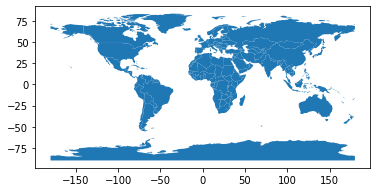

In [83]:
world.plot();

In [80]:
northAmerica = pd.DataFrame()
for i in world.groupby("continent"):
    if i[0] == "North America":
        northAmerica = i[1]

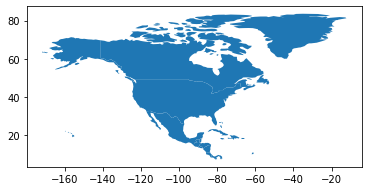

In [84]:
northAmerica.plot();

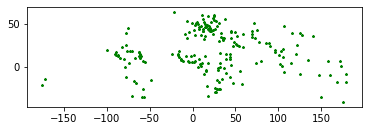

In [86]:
cities.plot(marker='*', color='green', markersize=5);
cities = cities.to_crs(world.crs)

In [99]:
print(cities['geometry'][0])

POINT (12.45338654497177 41.90328217996012)


## Load geojson

In [141]:
gt_df = geopandas.read_file("data.geojson")

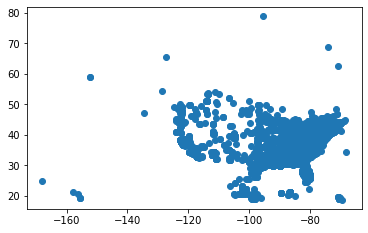

In [142]:
gt_df.plot();

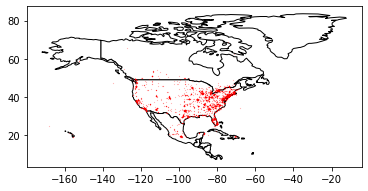

In [143]:
base = northAmerica.plot(color='white', edgecolor='black');
gt_df.plot(ax=base, marker='o', color='red', markersize=0.01);